### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [89]:
data = pd.read_csv('data/coupons.csv')

In [91]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [117]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [149]:
originaldata = data
originaldata.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [107]:
# Reset dataset
data = originaldata

3. Decide what to do about your missing data -- drop, replace, other...

In [151]:
data.drop_duplicates(inplace=True)

In [115]:
# Car column with blanks,
#data['car'] = data['car'].fillna('No data')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



In [153]:
(data['Y'] == 1).mean()

0.5675654242664552

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

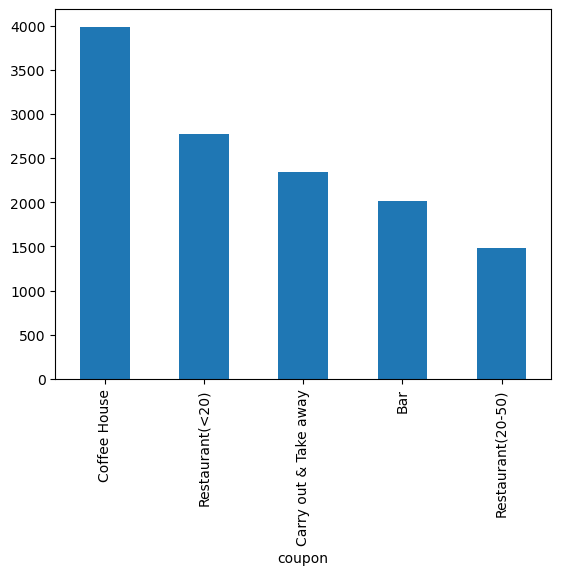

In [131]:
count_series = data['coupon'].value_counts()
count_series.plot(kind ='bar')

6. Use a histogram to visualize the temperature column.

(array([2305., 3830., 6475.]),
 array([30.        , 46.66666667, 63.33333333, 80.        ]),
 <BarContainer object of 3 artists>)

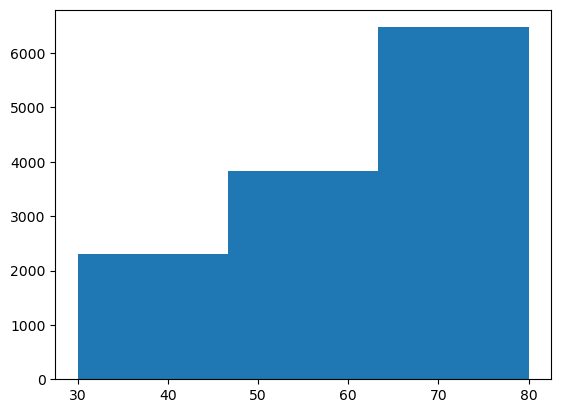

In [137]:
plt.hist(data['temperature'], bins = 3)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [283]:
data_new = data.query('coupon == "Bar"')

In [285]:
data_new

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [163]:
data_new.query('Y==1').shape[0] / data_new.shape[0]

0.4099502487562189

In [440]:
(data_new['Y'] == 1).mean()

0.4099502487562189

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [295]:
data_new['Bar'].isnull().sum()

21

In [301]:
#Assumption: Bar column == blank, we will replace the values to Never
#data_new['Bar'] = data_new['Bar'].fillna('never')

In [243]:
bar_less_equal_three = ['1~3', 'less1', 'never']
bar_more_three = ['4~8', 'gt8']

In [442]:
data_new.query('Y==1 and Bar in @bar_less_equal_three').shape[0] / data_new.shape[0]

0.3338308457711443

In [261]:
data_new.query('Y==1 and Bar in @bar_more_three').shape[0] / data_new.shape[0]

0.07611940298507462

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [249]:
bar_less_than_once = ['less1', 'never']

In [444]:
#data_new['age'] = data_new['age'].str.replace('50plus' , '51').str.replace('below21', '20')

In [446]:
#data_new['age'] = data_new['age'].astype(float)

In [355]:
data_new.query('Y==1 and Bar not in @bar_less_than_once and age >=25').shape[0] / data_new.shape[0]

0.14527363184079603

In [448]:
data_new.query('Y==1 and ~(Bar not in @bar_less_than_once and age >=25)').shape[0] / data_new.shape[0]

0.2646766169154229

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [303]:
data_new.query("Y==1 and Bar not in @bar_less_than_once and passanger != 'Kid(s)' and passanger != 'Alone' and occupation != 'Farming Fishing & Forestry'").shape[0] 
/ data_new.shape[0] 

0.06965174129353234

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [450]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
data_new.query("Y==1 and Bar not in @bar_less_than_once and passanger != 'Kid(s)' and passanger != 'Alone' and ~(maritalStatus == 'Divorced' and gender =='Female')").shape[0] / data_new.shape[0] * 100 

6.965174129353234

In [452]:
# go to bars more than once a month and are under the age of 30
data_new.query("Y==1 and Bar not in @bar_less_than_once and age <30").shape[0] / data_new.shape[0] * 100

12.388059701492537

In [367]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurant = ['4~8', 'gt8']
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']


In [454]:
data_new.query("Y==1 and RestaurantLessThan20 in @cheap_restaurant and income in @income_less_than_50k").shape[0] / data_new.shape[0] * 100

7.761194029850746

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [387]:
#The acceptance rate of bar coupon
(data_new['Y'] == 1).mean()

0.4099502487562189

In [417]:
#Bar Coupon Acceptance Rate by visiting frequency group
acceptance_rate_by_bar_visit = data_new.groupby('Bar')['Y'].mean() * 100

In [407]:
acceptance_rate_by_bar_visit

Bar
1~3      64.735516
4~8      78.000000
gt8      73.469388
less1    44.404973
never    19.271445
Name: Y, dtype: float64

<Axes: xlabel='Bar'>

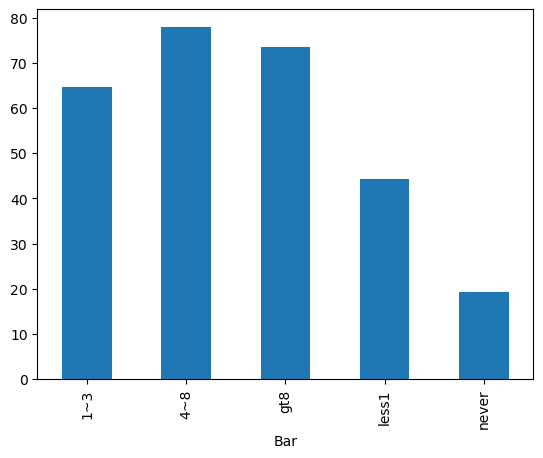

In [409]:
acceptance_rate_by_bar_visit.plot(kind ='bar')

In [419]:
#Bar Coupon Acceptance Rate by income group
acceptance_rate_by_income = data_new.groupby('income')['Y'].mean() * 100

In [421]:
acceptance_rate_by_income

income
$100000 or More     47.569444
$12500 - $24999     41.666667
$25000 - $37499     44.968553
$37500 - $49999     34.831461
$50000 - $62499     41.221374
$62500 - $74999     35.384615
$75000 - $87499     37.748344
$87500 - $99999     31.205674
Less than $12500    46.060606
Name: Y, dtype: float64

<Axes: xlabel='income'>

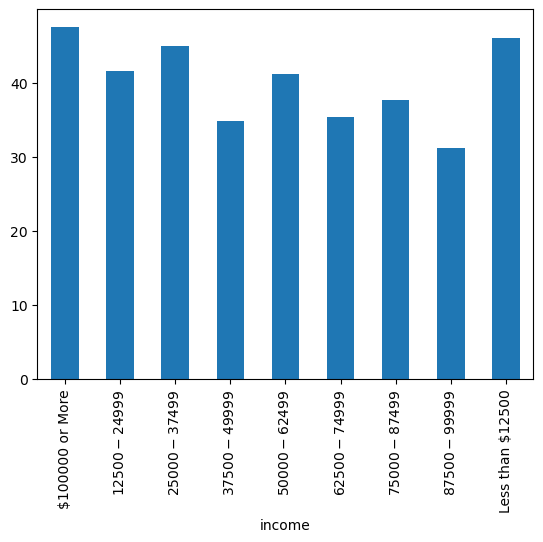

In [434]:
acceptance_rate_by_income.plot(kind ='bar')